# New York Taxi Analysis

Project Outline:

In this project, I will apply and demonstrate the data science pipeline to explore and use deterministic features to predict how much a cab driver can earn per hour in different areas of New York. Once we have the knowledge of which areas earn more and which areas earn less in any given day and any given hour. The union could distribute cab assignments more equitably across different areas, and rotate cab drivers between higher and lower-income areas on a daily basis. This way, there will not be cab driver would dominate in a high-income area while another cab driver would be continuously evicted to a low-income area. 

<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#import_data)
2. [Data exploration](#data_exploration)
3. [Data cleaning](#data_cleaning)
4. [Data preparation](#data_preparation)
5. [Benchmark model](#benchmark_model)<br>
6. [Feature engineering](#feature_engineering)
7. [Model training](#model_training)<br>
    7.1. [Decision Tree](#decision_tree)<br>
    7.2. [Random Forest](#random_forest)<br>
    7.3. [Gradient boosting](#gradient_boosting)<br>
    7.4. [Comparing algorithm performances](#comparing_algorithm_performances)<br>
8. [Tuning](#tuning)<br>
    8.1. [Find best parameters](#find_best_parameters)<br>
9. [Conclusion](#conclusion)<br>

# 0. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [188]:
import pandas as pd
import numpy as np
%matplotlib inline

# 1. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

In [2]:
taxi_jan_2019 = pd.read_csv('data/yellow_tripdata_2019-01.csv')
taxi_data = pd.concat([taxi_jan_2019])

In [3]:
print('The total number of rows is',taxi_data.shape[0])
taxi_data.head()

The total number of rows is 7667792


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


# 2. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

## OBJECTIVES:

**Understand the columns and only select the one we need**
    
**Check if there are potential problems with the data**

**Investigate the cause of such problems,and the possible impacts to our analysis**

**Decide how to deal with those data with problems** 

**Metadata link: https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf**

In [4]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

**Only Choose the columns that I am interested in:**

In [5]:
taxi_data=taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type','total_amount']]


In [6]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


In [7]:
taxi_data.describe()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
count,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06
mean,1.567078e+00,2.801084e+00,1.058371e+00,1.655009e+02,1.637529e+02,1.291776e+00,1.568222e+01
std,1.224431e+00,3.737529e+00,6.780889e-01,6.639180e+01,7.036445e+01,4.733229e-01,2.622932e+02
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.628000e+02
25%,1.000000e+00,9.000000e-01,1.000000e+00,1.300000e+02,1.130000e+02,1.000000e+00,8.190000e+00
50%,1.000000e+00,1.530000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.127000e+01
75%,2.000000e+00,2.800000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.656000e+01
max,9.000000e+00,8.318000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.232617e+05


array([[<AxesSubplot:title={'center':'passenger_count'}>,
        <AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'RatecodeID'}>],
       [<AxesSubplot:title={'center':'PULocationID'}>,
        <AxesSubplot:title={'center':'DOLocationID'}>,
        <AxesSubplot:title={'center':'payment_type'}>],
       [<AxesSubplot:title={'center':'total_amount'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

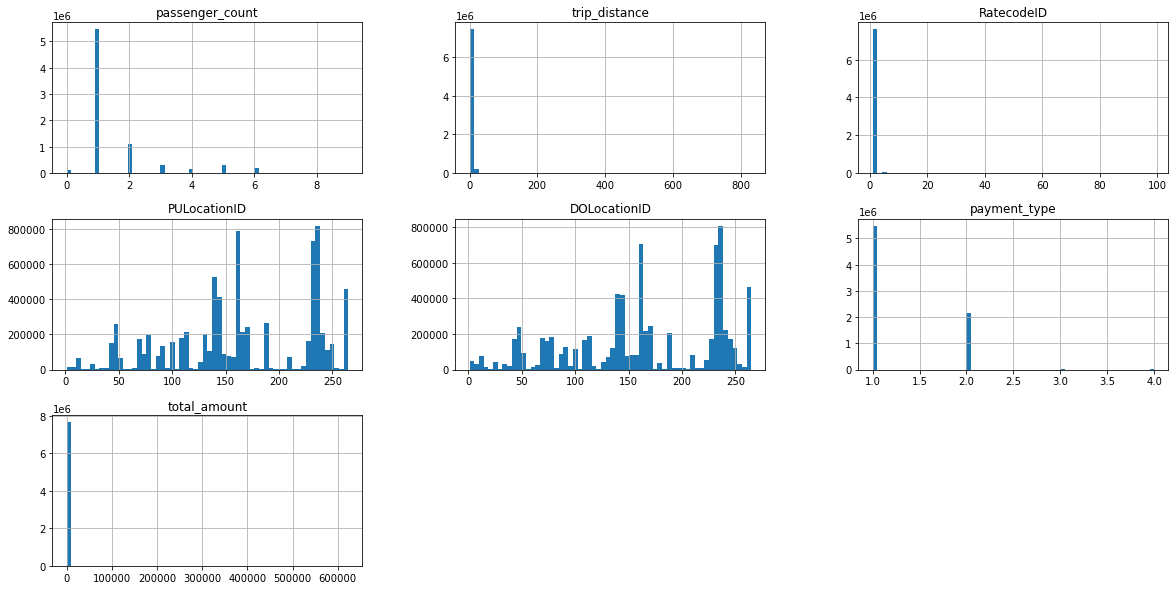

In [8]:
taxi_data.hist(bins=60,figsize=(20,10))

**Potential Problem 1: RateCode should only range from 1 to 6, x axis should not stretch to a hundred**

**Potential Problem 2: Total_Amount may have extreme values, it's abnormal to see payment stretched to tens of thousand USD**

**Potential Problem 3: Trip_Distance may have extreme values, couple hundred miles of trip distance is quite rare** 

 

In [9]:
taxi_data['RatecodeID'].value_counts()

1     7430139
2      166090
5       54569
3       11801
4        4895
99        252
6          46
Name: RatecodeID, dtype: int64

1=Standard rate
2=JFK
3=Newark
4=Nassau or Westchester 
5=Negotiated fare 
6=Group ride

**Response to Potential Problem 1: Ratecode ID 99 seems to be an error**

**Lets plot and check the outliers for total_amount**

<AxesSubplot:xlabel='index', ylabel='total_amount'>

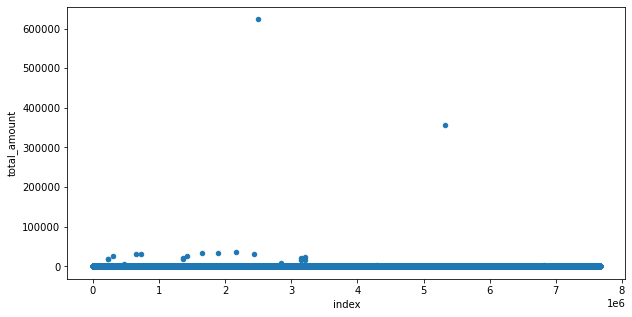

In [10]:
taxi_data.reset_index().plot.scatter('index','total_amount',figsize=(10,5))

**Lets plot for values under 1000**

<AxesSubplot:xlabel='index', ylabel='total_amount'>

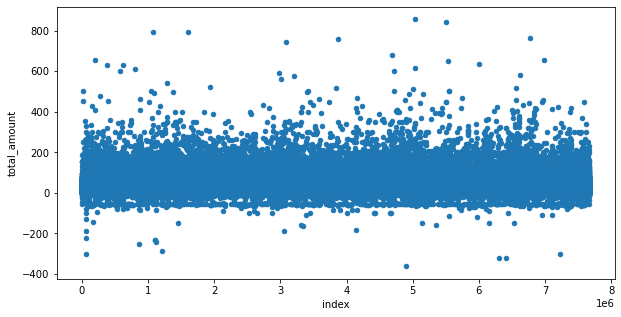

In [11]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot.scatter('index','total_amount',figsize=(10,5))

**There are negative values too, which doesn't make sense**

In [12]:
taxi_data[taxi_data['total_amount']<0].shape[0]

7131

**Lets check the first five columns that has nagative $ total_amount**

In [13]:
taxi_data[taxi_data['total_amount']<0].head().sort_values(by='total_amount', ascending=True)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1,4.13,1,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1,1.35,1,162,234,4,-9.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1,0.16,1,234,234,4,-4.3
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2,0.10,1,148,148,3,-3.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1,0.00,1,234,234,4,-3.8


**It seems like most of the negative $ amount has payment types of 3 or 4, let's double check**

In [14]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

3    4088
4    2666
2     376
1       1
Name: payment_type, dtype: int64

1= Credit card 2= Cash
3= No charge 4= Dispute
5= Unknown 6= Voided trip

**According to the metadata, Payment type 3 means 'No Charge', Type 4 means 'Dispute', that means they are not ordinary ocassions and something must have gone wrong. Those negative values is not helpful to our analysis and may even confuse our model.**

**Response to Potential Problem 2: Abnormal Payment types such as "no charge" and "dispute" is highly associated with negative $ payment**

0.00     1431
0.01      320
0.02      213
0.03      193
0.04      157
         ... 
8.24        1
4.19        1
13.33       1
5.62        1
5.65        1
Name: trip_distance, Length: 662, dtype: int64


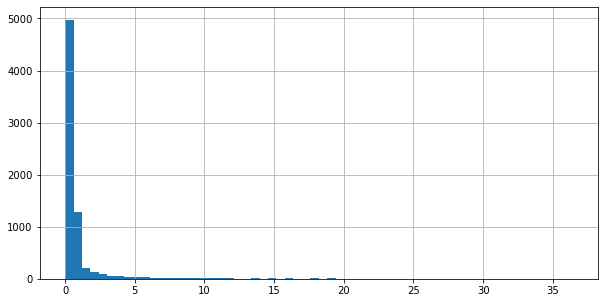

In [15]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins=60,figsize=(10,5))
print(taxi_data[taxi_data['total_amount']<0]['trip_distance'].value_counts())

**There were around 5000 records of trips traveled for nearly zero trip_distance among those with negative $total amount**

**It doesn't make sense to see anyone paying negative dollars for a cab. If that was because someone get into the cab and don't want to go anywhere, these records are not going to be useful and may confuse the model**

**It also doesn't make sense to see anyone paying zero dollars for a cab, lets do some analysis for zero $total amount** 

**The payment type, PULocationID and DO LocationID caught my attention**

In [16]:
taxi_data[taxi_data['total_amount']==0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1,0.0,5,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1,0.0,5,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1,0.0,1,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1,0.0,1,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1,0.0,1,264,7,2,0.0


In [17]:
zeros=taxi_data[(taxi_data['total_amount']==0)&(taxi_data['trip_distance']==0)]

print(zeros['payment_type'].value_counts())

print(zeros['PULocationID'].value_counts())

print(zeros['DOLocationID'].value_counts())

1    775
2    478
3     16
4      1
Name: payment_type, dtype: int64
193    700
264    256
7       64
132     17
145     17
      ... 
43       1
17       1
65       1
224      1
1        1
Name: PULocationID, Length: 72, dtype: int64
193    854
264    262
7       77
145     17
152     15
207     13
161      3
48       2
246      2
186      2
142      2
150      2
261      1
249      1
238      1
233      1
197      1
230      1
158      1
179      1
170      1
45       1
148      1
140      1
132      1
114      1
113      1
100      1
87       1
79       1
265      1
Name: DOLocationID, dtype: int64


<a id='zero_distance'></a>

In [18]:
zeros.count()

tpep_pickup_datetime     1270
tpep_dropoff_datetime    1270
passenger_count          1270
trip_distance            1270
RatecodeID               1270
PULocationID             1270
DOLocationID             1270
payment_type             1270
total_amount             1270
dtype: int64

In [19]:
taxi_data[taxi_data['trip_distance']==0]['total_amount'].value_counts()

 3.30      10279
 3.80       5902
 4.30       3780
 52.80      1491
 0.00       1270
           ...  
 29.99         1
 187.56        1
 31.14         1
-11.00         1
 239.16        1
Name: total_amount, Length: 3546, dtype: int64

**There are 1270 records of entries having zero trip_distance with zero $total amount. However, there are some positive total amount with zero trip distance too, that means it's likely that the data of trip distance is more inaccurate than total amount.**

**Further analysis shows that Pickup location ID and dropoff location ID of 193 and 264 together had the highest number of zero dollar payment, and most of the riders used payment type 1 and 2 (Credit Card and Cash). Those two location are very close to each other, meaning that they had traveled for a very short distance but the data could not capture such a small distance precisely, also I ruled out the possibility of a void trip or other wierd situation because customers were using normal means to pay their fares**

**As a result, I conclude that such zeros belongs to technical error in certain regions that could only be solved by subject matter expert. No further data transformation necessary but to filter out the entries with zero amount.**



**After finishing off the zeros and negatives, Let's take a look of the extremely high numbers too**

<AxesSubplot:xlabel='index', ylabel='total_amount'>

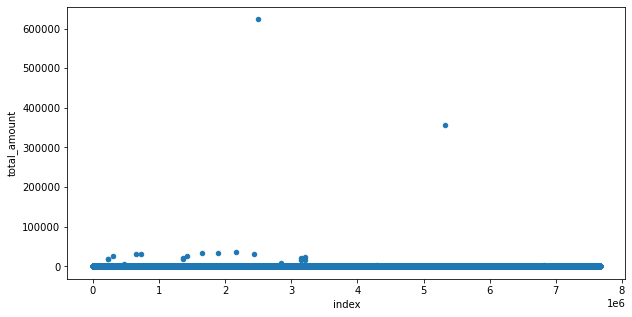

In [20]:
taxi_data.reset_index().plot.scatter('index','total_amount',figsize=(10,5))

**The 2 data point doesn't make sense, how come it cost 40,000 to ride a taxi. Let's determine how many outliers should we filter out by setting an reasonable range of taxi fares, so that our model can have more reasonable inputs**

In [21]:
taxi_data[taxi_data['total_amount']>500]['trip_distance'].value_counts()

0.00      29
0.10       4
19.90      2
15.90      1
21.70      1
1.11       1
110.04     1
1.00       1
107.80     1
8.55       1
123.42     1
0.50       1
9.70       1
113.58     1
14.64      1
100.80     1
214.01     1
2.40       1
16.60      1
17.50      1
5.90       1
8.50       1
131.47     1
1.50       1
Name: trip_distance, dtype: int64

**29 rows having trip distance of 0 has a total amount greater than $500, that justifies the decision to drop data with trip distance of zero because they contain lots of error.**

In [22]:
print('There are {} rows of entries having a $total amount above $500USD'.format(taxi_data[taxi_data['total_amount']>500].shape[0]))
print('There are {} rows of entries having a $total amount above $200USD'.format(taxi_data[taxi_data['total_amount']>200].shape[0]))

There are 56 rows of entries having a $total amount above $500USD
There are 1166 rows of entries having a $total amount above $200USD


**Filtering everything higher than $200 will result in 1000 loss of data points, it sounds like a good compromise and it will make more sense to limit the range that we are trying to predict how much people will pay in each region**

In [23]:
taxi_data['total_amount'].mean()

15.68222215901336

**Since the average is just over 15, we can agree to cut from $200 level**

# 3. Data cleaning <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

**OBJECTIVES:**

**Filtering out the outliers**

**Check if there are any missing values and duplicates**


**I decided to eliminate all the rows with total_amount of zeros, negative numbers and above $200**

In [24]:
taxi_data_filtered=taxi_data[(taxi_data['total_amount']>0)&(taxi_data['total_amount']<200)]

In [25]:
print(taxi_data.shape)
taxi_data_filtered.shape

(7667792, 9)


(7658076, 9)

In [26]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

In [27]:
taxi_data_filtered.duplicated().sum()

0

**For this phase, I have filtered the data and checked that there is no missing values and duplicates**

# 4. Data preparation <a id='data_preparation'></a>
[Back to top](#table_of_contents)

**OBJECTIVES:**

**Transform the data into the formats suitable for analysis**

**Make sure the datatypes are appropriate**

**Categorize the columns**

In [28]:
taxi_data_prepared=taxi_data_filtered.copy()

In [29]:
taxi_data_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7658076 entries, 0 to 7667787
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   tpep_pickup_datetime   object 
 1   tpep_dropoff_datetime  object 
 2   passenger_count        int64  
 3   trip_distance          float64
 4   RatecodeID             int64  
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   payment_type           int64  
 8   total_amount           float64
dtypes: float64(2), int64(5), object(2)
memory usage: 584.3+ MB


**Transforming some variables into suitable formats, such as converting object to datetime, and integer to string**

In [30]:
taxi_data_prepared['tpep_pickup_datetime']=pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'])
taxi_data_prepared['tpep_dropoff_datetime']=pd.to_datetime(taxi_data_prepared['tpep_dropoff_datetime'])

In [31]:
taxi_data_prepared['RatecodeID']=taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared['PULocationID']=taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared['DOLocationID']=taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared['payment_type']=taxi_data_prepared['payment_type'].astype(str)

In [32]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [33]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


**I want to also split the pickup_datetime into seperate columns, so that they may feed into the model easier**

In [34]:
taxi_data_prepared['transaction_date']=pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
taxi_data_prepared['transaction_year']=taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month']=taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day']=taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour']=taxi_data_prepared['tpep_pickup_datetime'].dt.hour

taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55,2018-11-28,2018,11,28,15


**This dataset should not include months other than January and years other than 2019.
But the above table showed 2018 and Nov/Dec. Further investigation is necessary**

array([[<AxesSubplot:title={'center':'tpep_pickup_datetime'}>,
        <AxesSubplot:title={'center':'tpep_dropoff_datetime'}>,
        <AxesSubplot:title={'center':'passenger_count'}>],
       [<AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'total_amount'}>,
        <AxesSubplot:title={'center':'transaction_date'}>],
       [<AxesSubplot:title={'center':'transaction_year'}>,
        <AxesSubplot:title={'center':'transaction_month'}>,
        <AxesSubplot:title={'center':'transaction_day'}>],
       [<AxesSubplot:title={'center':'transaction_hour'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

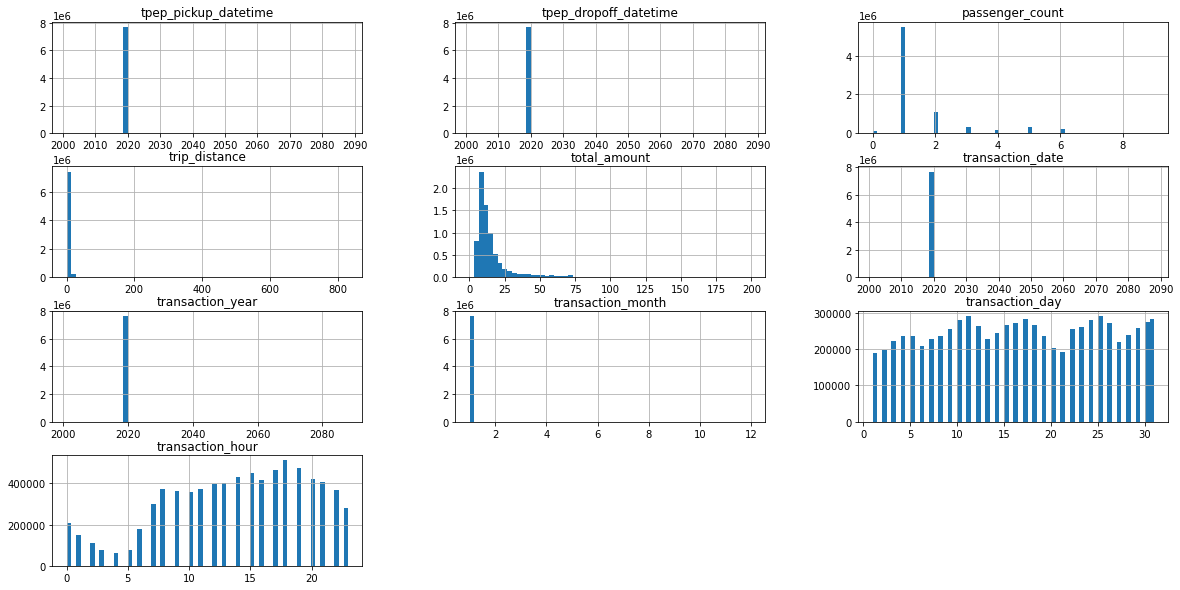

In [35]:
taxi_data_prepared.hist(figsize=(20,10),bins=60)

In [36]:
taxi_data_prepared['transaction_year'].value_counts()

2019    7657638
2018        365
2009         48
2008         22
2088          2
2001          1
Name: transaction_year, dtype: int64

In [37]:
taxi_data_prepared['transaction_month'].value_counts()

1     7657594
12        377
2          73
11         10
4           6
7           6
3           5
6           2
5           1
8           1
9           1
Name: transaction_month, dtype: int64

**Let's filter out everything other than 2019 and January**

In [38]:
taxi_data_prepared=taxi_data_prepared[taxi_data_prepared['transaction_month']==1]
taxi_data_prepared=taxi_data_prepared[taxi_data_prepared['transaction_year']==2019]

**Noting down the Categorical and Numerical columns**

In [39]:
categorical_columns=['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_columns=['trip_distance','total_amount']
all_needed_columns=categorical_columns+numerical_columns

In [40]:
main_taxi_df=taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()


(7657544, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


In [41]:
##just want to check the total number of pickups at location 151
ID_151=main_taxi_df['PULocationID']=='151'
main_taxi_df[ID_151].shape[0]

69537

**I'll aggregate the data based on the Categorical Columns, that means averaging the trip distance and trip fare of the same hour within that region. I'll also add a column to have the numbers of aggregated transactions for reference**

In [42]:
taxi_grouped_by_region=main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['transactions_aggregated']=main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape) 
taxi_grouped_by_region.head()

(102521, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transactions_aggregated
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


**This table is cleaned. It has the correct year, month; and is free from duplicates, missing values, outliers, negative values. The table also filters out the rows with payment greater than 200. The only potential problem is the zero trip_distance because the data doesn't have accurate measure for low trip distance within the same region, as stated above.
 [zero_distance](#zero_distance)**

<AxesSubplot:>

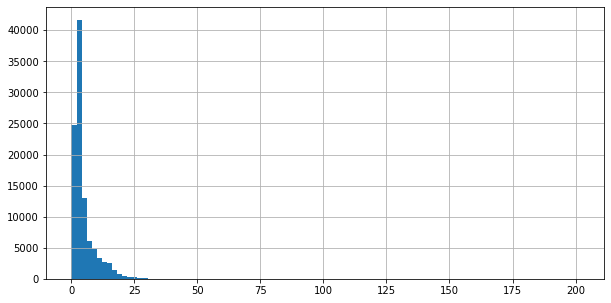

In [43]:
taxi_grouped_by_region['trip_distance'].hist(bins=100,figsize=(10,5))

<AxesSubplot:>

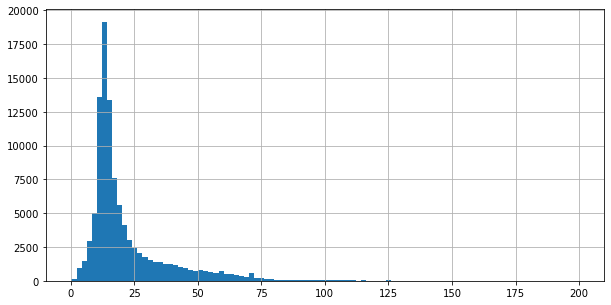

In [44]:
taxi_grouped_by_region['total_amount'].hist(bins=100,figsize=(10,5))

# 5. Benchmark model <a id='benchmark_model'></a>
[Back to top](#table_of_contents)

**OBJECTIVES:**

**Defining Input Variables and Response Variable**

**Using Location, Data Time to predict Total Amount of Taxi Fares**

In [45]:
data_for_benchmark_model = taxi_grouped_by_region.copy()

In [46]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark = categorical_features_benchmark
target_features_benchmark = 'total_amount'

# 5.1 Train-test split

**33% of our sample data assign to the testing set of our ML model**

In [47]:
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
Y_bench = data_for_benchmark_model[target_features_benchmark]

# one-hot encoding for categorical features
X_bench = pd.get_dummies(X_bench)


X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, Y_bench, test_size=0.33, random_state=42)

# 5.2 Fit a model to the data

In [48]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)

# 5.3 Model evaluation

In [49]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 9.75885306296908
mean_squared_error 216.21219644058777
root_mean_squared_error 14.70415575409169
r2 0.21540323900352887


A common rule of thumb for a good RMSE is it's lower than two times the MAE score

<AxesSubplot:xlabel='true', ylabel='pred'>

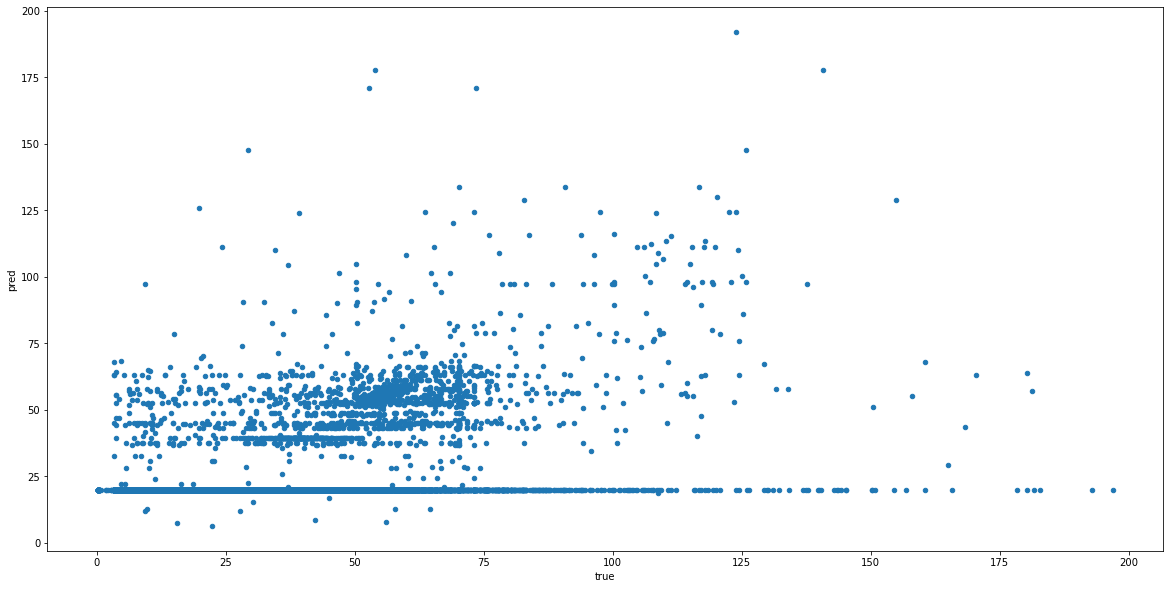

In [50]:
data = {'true':y_test_b, 'pred':y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10),kind='scatter',x='true',y='pred')

# 6. Feature engineering <a id='feature_engineering'></a>
[Back to top](#table_of_contents)

In [51]:
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transactions_aggregated
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


In [52]:
data_with_new_features = taxi_grouped_by_region.copy()

**1. Adding Date-related features is useful because the demand on taxi is different in weekdays and weekends, therefore I will add weekend and holiday boolean as a new feature.**

In [53]:
data_with_new_features['transaction_week_day']=data_with_new_features['transaction_date'].dt.weekday
data_with_new_features['weekend']=data_with_new_features['transaction_week_day'].apply(lambda x: True if x==5 or x==6 else False) 

In [54]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays_2019 = cal.holidays(start='2018', end='2020').date

data_with_new_features['is_holiday']=data_with_new_features['transaction_date'].isin(holidays_2019)

In [55]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transactions_aggregated,transaction_week_day,weekend,is_holiday
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True


**2. Adding Borough information as a new location-based information. We have Location IDs per region but there is a higher level abstraction for regions called Boroughs. This information came from the source of the main data.**

In [56]:
zone_lookup=pd.read_csv('data/taxi_zone_lookup.csv')
print(zone_lookup.dtypes)
zone_lookup.head()


LocationID       int64
Borough         object
Zone            object
service_zone    object
dtype: object


,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [57]:
zone_lookup=zone_lookup[['LocationID','Borough']]
zone_lookup['LocationID']=zone_lookup['LocationID'].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [58]:
data_with_new_features = data_with_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
data_with_new_features.drop('LocationID',axis=1,inplace=True)
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transactions_aggregated,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


Manhattan        45309
Brooklyn         23632
Queens           21971
Bronx             9584
Unknown           1453
Staten Island      302
EWR                270
Name: Borough, dtype: int64


<AxesSubplot:>

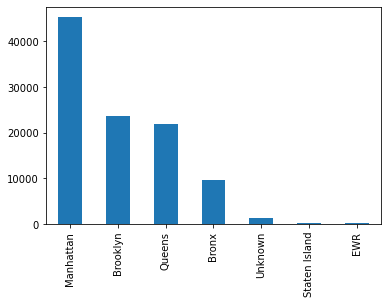

In [59]:
print(data_with_new_features['Borough'].value_counts())
data_with_new_features['Borough'].value_counts().plot(kind='bar')

**3. Adding weather related data such as percipitation, temperature, cloud cover may help because people may be more willing to take a taxi if the weather is bad.**

In [60]:
nyc_weather = pd.read_csv('data/nyc_weather.csv')
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,31.12.2019 22:00,6.1,65,6,100%.,0.3
1,31.12.2019 19:00,6.7,71,5,70 – 80%.,NaN
2,31.12.2019 16:00,7.2,66,5,50%.,NaN
3,31.12.2019 13:00,6.1,76,3,100%.,Trace of precipitation
4,31.12.2019 10:00,4.4,83,2,100%.,Trace of precipitation


In [61]:
nyc_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2936 entries, 0 to 2935
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date and time            2936 non-null   object 
 1   temperature              2936 non-null   float64
 2   humidity                 2936 non-null   int64  
 3   wind speed               2936 non-null   int64  
 4   cloud cover              2932 non-null   object 
 5   amount of precipitation  696 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 137.8+ KB


In [62]:
nyc_weather['cloud cover'].value_counts(dropna=False)

70 – 80%.                                                     973
100%.                                                         896
20–30%.                                                       479
50%.                                                          413
no clouds                                                     168
NaN                                                             4
Sky obscured by fog and/or other meteorological phenomena.      3
Name: cloud cover, dtype: int64

In [63]:
nyc_weather['amount of precipitation'].value_counts(dropna=False)


NaN                       2240
Trace of precipitation     266
0.3                         61
2.0                         49
1.0                         45
0.8                         42
0.5                         42
4.0                         33
5.0                         24
3.0                         23
6.0                         19
7.0                         13
8.0                         13
9.0                         11
10.0                        10
13.0                         7
12.0                         7
15.0                         6
11.0                         5
16.0                         3
22.0                         2
14.0                         2
29.0                         2
18.0                         1
24.0                         1
20.0                         1
25.0                         1
68.0                         1
34.0                         1
21.0                         1
35.0                         1
63.0                         1
30.0    

**Potential Datatypes problem:
Datetime, humidity in %, cloud cover in %, Precipitation have mixed types of data and have lots of nulls. Data cleaning required.**

In [64]:
nyc_weather.isna().sum()

date and time                 0
temperature                   0
humidity                      0
wind speed                    0
cloud cover                   4
amount of precipitation    2240
dtype: int64

**Fixing amount of precipitation data problems by filling NaN and replacing strings with 0.1**

In [65]:
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].replace('Trace of precipitation', 0.1)
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].astype(float)

#Option 1: Filling NaN with 0, however, I think it's a little bit too much zeros in this case 
#nyc_weather['amount of precipitation']=nyc_weather['amount of precipitation'].fillna(0,inplace=True)
#Option 2: Forward Filling NaNs
#nyc_weather['amount of precipitation']=nyc_weather['amount of precipitation'].fillna(method='ffill',inplace=True)
#option 3: Filling NaN with average value between one unit before and after 
nyc_weather['amount of precipitation'].interpolate(inplace=True)

In [66]:
nyc_weather['amount of precipitation'].value_counts()

0.100000    762
0.300000     67
2.000000     52
1.000000     46
0.500000     44
           ... 
5.521429      1
0.882609      1
0.340000      1
0.228000      1
3.550000      1
Name: amount of precipitation, Length: 1401, dtype: int64

**Fixing cloud cover %**

In [67]:
nyc_weather['cloud cover']=nyc_weather['cloud cover'].replace('70 – 80%.', 0.7)
nyc_weather['cloud cover']=nyc_weather['cloud cover'].replace('100%.', 1)
nyc_weather['cloud cover']=nyc_weather['cloud cover'].replace('20–30%.', 0.3)
nyc_weather['cloud cover']=nyc_weather['cloud cover'].replace('50%.', 0.5)
nyc_weather['cloud cover']=nyc_weather['cloud cover'].replace('no clouds', 0)
nyc_weather['cloud cover']=nyc_weather['cloud cover'].replace('Sky obscured by fog and/or other meteorological phenomena.', 0)
nyc_weather['cloud cover']=nyc_weather['cloud cover'].astype(float)
nyc_weather['cloud cover'].interpolate(inplace=True)

In [68]:
nyc_weather['cloud cover'].value_counts()

0.7    973
1.0    900
0.3    479
0.5    413
0.0    171
Name: cloud cover, dtype: int64

In [69]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                float64
amount of precipitation    float64
dtype: object

In [70]:
nyc_weather['date and time']=pd.to_datetime(nyc_weather['date and time'])
nyc_weather['hour']=nyc_weather['date and time'].dt.hour
nyc_weather['day']=nyc_weather['date and time'].dt.day
nyc_weather['month']=nyc_weather['date and time'].dt.month

In [71]:
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,day,month
0,2019-12-31 22:00:00,6.1,65,6,1.0,0.300000,22,31,12
1,2019-12-31 19:00:00,6.7,71,5,0.7,0.233333,19,31,12
2,2019-12-31 16:00:00,7.2,66,5,0.5,0.166667,16,31,12
3,2019-12-31 13:00:00,6.1,76,3,1.0,0.100000,13,31,12
4,2019-12-31 10:00:00,4.4,83,2,1.0,0.100000,10,31,12


**We can proceed to merge the nyc_weather with our main table called data_with_new_features**

In [72]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transactions_aggregated,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [73]:
nyc_taxi_with_weather=data_with_new_features.merge(nyc_weather,left_on=['transaction_month','transaction_day','transaction_hour'],right_on=['month','day','hour'],how='left')
print(nyc_taxi_with_weather.shape)
nyc_taxi_with_weather.head()

(102521, 21)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transactions_aggregated,transaction_week_day,weekend,...,Borough,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,day,month
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,...,EWR,2019-01-01 10:00:00,15.6,62.0,11.0,0.7,0.473333,10.0,1.0,1.0


In [74]:
nyc_taxi_with_weather=nyc_taxi_with_weather.drop(['date and time','hour','day','month'],axis=1)

In [75]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transactions_aggregated,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR,15.6,62.0,11.0,0.7,0.473333


In [76]:
nyc_taxi_with_weather.isna().sum()

PULocationID                   0
transaction_date               0
transaction_month              0
transaction_day                0
transaction_hour               0
trip_distance                  0
total_amount                   0
transactions_aggregated        0
transaction_week_day           0
weekend                        0
is_holiday                     0
Borough                        0
temperature                68347
humidity                   68347
wind speed                 68347
cloud cover                68347
amount of precipitation    68347
dtype: int64

In [77]:
nyc_taxi_with_weather=nyc_taxi_with_weather.sort_values(by=['transaction_date','transaction_hour']).reset_index().drop('index',axis=1)

In [78]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transactions_aggregated,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,10,2019-01-01,1,1,0,3.020000,14.300000,2,1,False,True,Queens,NaN,NaN,NaN,NaN,NaN
1,100,2019-01-01,1,1,0,2.801852,18.130000,54,1,False,True,Manhattan,NaN,NaN,NaN,NaN,NaN
2,106,2019-01-01,1,1,0,2.593333,15.373333,3,1,False,True,Brooklyn,NaN,NaN,NaN,NaN,NaN
3,107,2019-01-01,1,1,0,2.437458,14.897458,421,1,False,True,Manhattan,NaN,NaN,NaN,NaN,NaN
4,11,2019-01-01,1,1,0,1.795000,9.300000,2,1,False,True,Brooklyn,NaN,NaN,NaN,NaN,NaN


Not all weather data can correspond to the exact timing of transaction because the weather was recorded in a 3 hour interval. To fill in the nulls, we can:
1) First Interpolate first to fill in the missing data in the middle of two points

2) Then Backward filling to fill in remaining nulls

In [79]:
nyc_taxi_with_weather=nyc_taxi_with_weather.interpolate()
nyc_taxi_with_weather=nyc_taxi_with_weather.fillna(method='bfill')
nyc_taxi_with_weather.isna().sum()

PULocationID               0
transaction_date           0
transaction_month          0
transaction_day            0
transaction_hour           0
trip_distance              0
total_amount               0
transactions_aggregated    0
transaction_week_day       0
weekend                    0
is_holiday                 0
Borough                    0
temperature                0
humidity                   0
wind speed                 0
cloud cover                0
amount of precipitation    0
dtype: int64

In [80]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transactions_aggregated,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,10,2019-01-01,1,1,0,3.020000,14.300000,2,1,False,True,Queens,8.3,97.0,0.0,1.0,29.0
1,100,2019-01-01,1,1,0,2.801852,18.130000,54,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0
2,106,2019-01-01,1,1,0,2.593333,15.373333,3,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0
3,107,2019-01-01,1,1,0,2.437458,14.897458,421,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0
4,11,2019-01-01,1,1,0,1.795000,9.300000,2,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0


In [81]:
nyc_taxi_with_weather.to_csv('nyc_taxi_with_weather.csv')

# 7. Model training <a id='model_training'></a>
[Back to top](#table_of_contents)

In [82]:
data_for_model = nyc_taxi_with_weather.copy()

In [83]:
categorical_features = ['PULocationID','transaction_month','transaction_day','transaction_hour','transaction_week_day','weekend','is_holiday','Borough']
input_features = categorical_features + ['temperature','humidity','wind speed','cloud cover','amount of precipitation']
target_feature = 'total_amount'

**Train-Test split**

In [84]:
from sklearn.model_selection import train_test_split

X = data_for_model[input_features]
y = data_for_model[target_feature]

# one-hot encode
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

## 7.1. Decision tree <a id='decision_tree'></a>

In [85]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train,y_train)

##using training set to train the model

DecisionTreeRegressor(max_depth=10)

In [86]:
model_at_hand = decision_tree

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

## Test Error
##Using X_train y_train to formulate model
##using X_test to generate y_pred -->predicted return
##comparing predicted return with y_testing to see the error 

mean_absolute_error 8.451738280975485
mean_squared_error 188.89817086621153
root_mean_squared_error 13.744023096102957
r2 0.31434226190400383


<AxesSubplot:xlabel='true', ylabel='pred'>

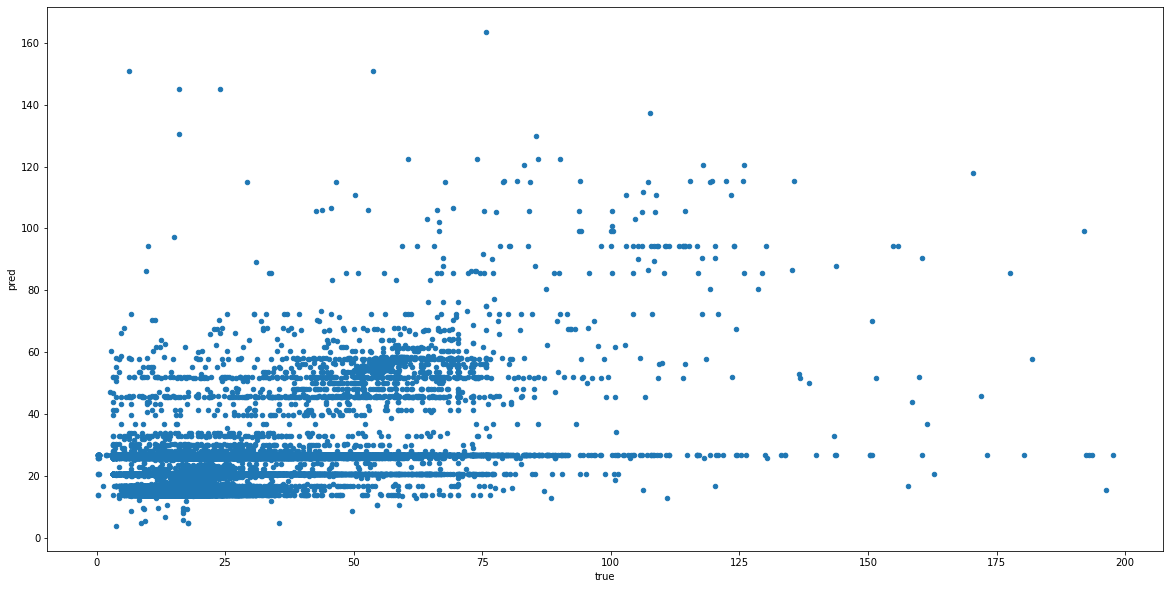

In [87]:
data = {'true':y_test, 'pred':y_pred}
results = pd.DataFrame(data)

results.plot.scatter('true', 'pred',figsize=(20,10)) 

**Beware of Overfitting**

**The decision tree model tends to fit the training data's pattern so much that it loses the ability to generalize. I will plug in several max_depth parameter and plot it out.**  

In [88]:
X_train_overfit = X_train
y_train_overfit = y_train

X_test_overfit = X_test
y_test_overfit = y_test

In [89]:
rmse_scores = {'max_depth':[],'rmse_train':[],'rmse_test':[]}

for md in [2, 5, 8, 10, 12, 15, 20, 30, 50, 70, 100, 150]:
    print(md)
    decision_tree_overfit = DecisionTreeRegressor(max_depth=md)
    decision_tree_overfit.fit(X_train_overfit, y_train_overfit)

    model_at_hand_overfit = decision_tree_overfit
##Training Error
    y_pred_train = decision_tree_overfit.predict(X_train_overfit)
    rmse_train = sqrt(mean_squared_error(y_train_overfit, y_pred_train))
##Test Error
    y_pred_test = decision_tree_overfit.predict(X_test_overfit)
    rmse_test = sqrt(mean_squared_error(y_test_overfit, y_pred_test))
##We can make a dataframe for the following three rmse_scores
    rmse_scores['max_depth'].append(md)
    rmse_scores['rmse_train'].append(rmse_train)
    rmse_scores['rmse_test'].append(rmse_test)

2
5
8
10
12
15
20
30
50
70
100
150


In [90]:
pd.DataFrame.from_dict(rmse_scores)


,max_depth,rmse_train,rmse_test
0,2,1.505583e+01,14.911673
1,5,1.426957e+01,14.151204
2,8,1.367158e+01,13.730784
3,10,1.327505e+01,13.705033
4,12,1.285206e+01,13.743696
5,15,1.214036e+01,14.097102
6,20,1.116713e+01,14.357293
7,30,9.820717e+00,14.899398
8,50,6.762163e+00,16.131486
9,70,2.584929e+00,17.155391


Text(0.5, 1.0, 'rmse of training vs. testing datasets')

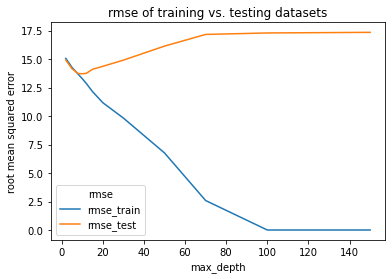

In [91]:
import seaborn as sns
df=pd.DataFrame.from_dict(rmse_scores)
df = df.melt('max_depth', value_name='root mean squared error',var_name='rmse')
axx=sns.lineplot(data=df,x='max_depth',y='root mean squared error',hue='rmse')
axx.set_title('rmse of training vs. testing datasets')

Text(0, 0.5, 'root mean squared error')

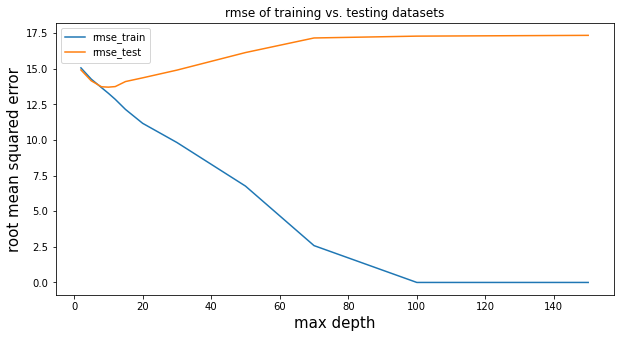

In [92]:
ax = pd.DataFrame.from_dict(rmse_scores).plot(x='max_depth',title="rmse of training vs. testing datasets",figsize=(10,5))
ax.set_xlabel("max depth", fontsize=15)
ax.set_ylabel("root mean squared error", fontsize=15)

**For all the max depth I have tried from 2 to 150, the test error starts getting higher after max depth of 10 as the model started to overfit and loses the ability to generalize**

**The best R^2 that we can get from decision tree algorithm is 0.30 by applying the max depth of 10**

**I will also take a look of the training and testing performance**

In [95]:
X_train_performance = X_train
y_train_performance = y_train

X_test_performance = X_test
y_test_performance = y_test

In [96]:
decision_tree_performance = DecisionTreeRegressor(max_depth=10)
decision_tree_performance.fit(X_train_performance,y_train_performance)

#Training Performance 

model_at_hand_performance = decision_tree_performance

y_pred_performance = model_at_hand_performance.predict(X_train_performance)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_train_performance, y_pred_performance))
print('mean_squared_error', mean_squared_error(y_train_performance, y_pred_performance))
print('root_mean_squared_error', sqrt(mean_squared_error(y_train_performance, y_pred_performance)))
print('r2', r2_score(y_train_performance, y_pred_performance))

mean_absolute_error 8.18792592262742
mean_squared_error 176.22695661776115
root_mean_squared_error 13.275050154999835
r2 0.36284069377468964


In [97]:
#Testing Performance 

model_at_hand_performance = decision_tree_performance

y_pred_performance = model_at_hand_performance.predict(X_test_performance)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_performance, y_pred_performance))
print('mean_squared_error', mean_squared_error(y_test_performance, y_pred_performance))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_performance, y_pred_performance)))
print('r2', r2_score(y_test_performance, y_pred_performance))

mean_absolute_error 8.44650764597081
mean_squared_error 188.36736343243825
root_mean_squared_error 13.724699028847162
r2 0.3162689731195576


## 7.2. Random forest <a id='random_forest'></a>

In [98]:
from sklearn.ensemble import RandomForestRegressor

rando_model = RandomForestRegressor()
rando_model.fit(X_train, y_train)

RandomForestRegressor()

In [99]:
model_at_hand = rando_model

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 7.379618244552733
mean_squared_error 167.9655068527719
root_mean_squared_error 12.960150726468111
r2 0.39032310911900325


<AxesSubplot:xlabel='true', ylabel='pred'>

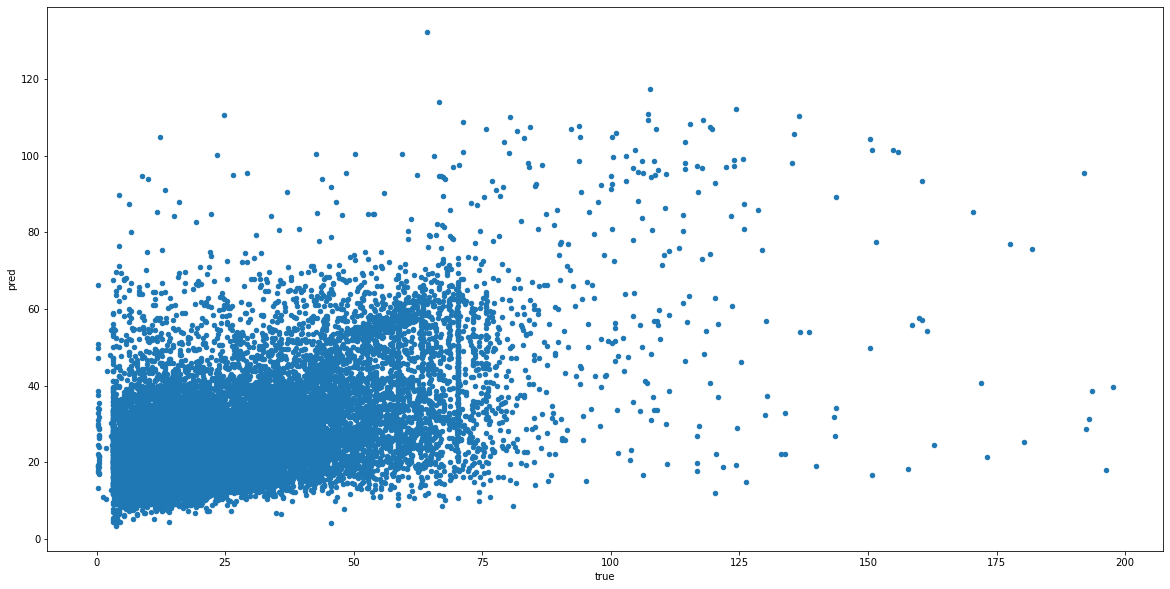

In [100]:
data = {'true':y_test, 'pred':y_pred}
results=pd.DataFrame(data)

results.plot.scatter('true', 'pred',figsize=(20,10)) 

## 7.3. Gradient boosting <a id='gradient_boosting'></a>

In [101]:
from sklearn.ensemble import GradientBoostingRegressor

gradBooster = GradientBoostingRegressor()
gradBooster.fit(X_train, y_train)

GradientBoostingRegressor()

In [102]:
model_at_hand = gradBooster

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 8.313695290574644
mean_squared_error 172.40613067646993
root_mean_squared_error 13.130351506203858
r2 0.3742046466017115


<AxesSubplot:xlabel='true', ylabel='pred'>

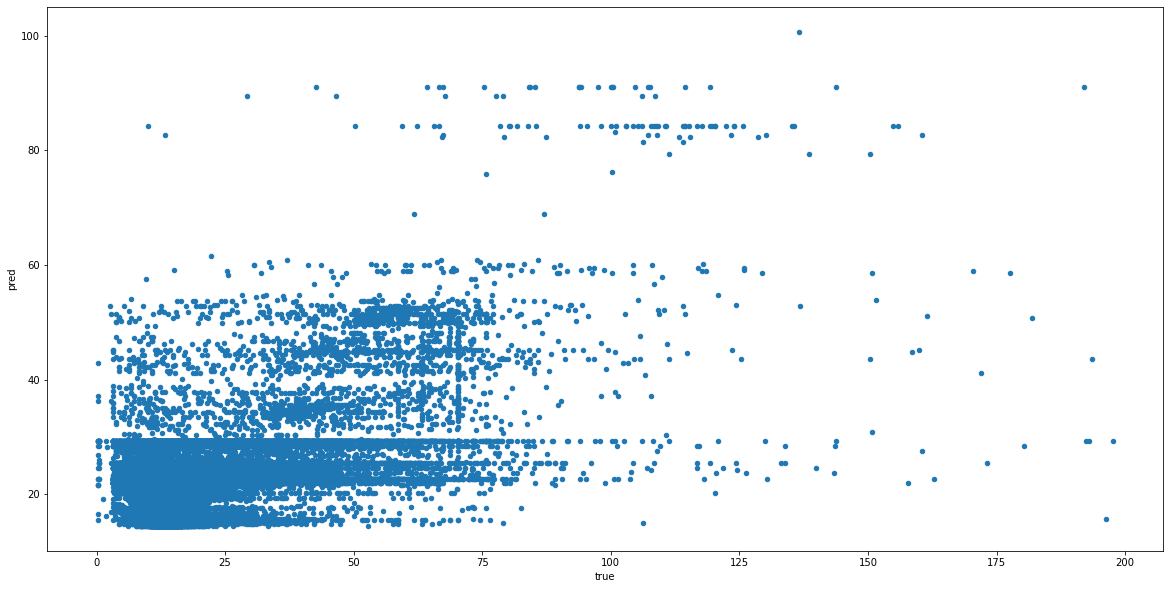

In [103]:
data={'true':y_test,'pred':y_pred}
results=pd.DataFrame(data)

results.plot.scatter('true', 'pred',figsize=(20,10)) 

<AxesSubplot:>

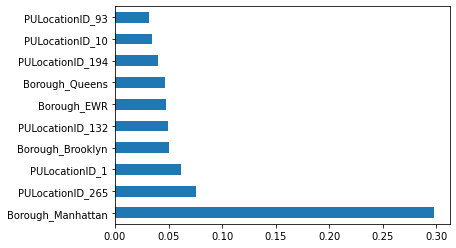

In [104]:
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
 .nlargest(10).plot(kind='barh'))

## 7.4. Comparing algorithm performances <a id='comparing_algorithm_performances'></a>

In [105]:
results = {'Algorithm':['Benchmark model','Decision tree','Random forest','Gradient boosting'],'MAE':[9.778,8.534,7.426,8.388],'RMSE':[14.739,14.011,13.212,13.378],'R2':[0.225,0.308,0.385,0.369]}

pd.DataFrame.from_dict(results)

,Algorithm,MAE,RMSE,R2
0,Benchmark model,9.778,14.739,0.225
1,Decision tree,8.534,14.011,0.308
2,Random forest,7.426,13.212,0.385
3,Gradient boosting,8.388,13.378,0.369


**Random forest is the best model as it has the highest R^2**

# 8. Tuning <a id='tuning'></a>
[Back to top](#table_of_contents)

## 8.1. Find best parameters<a id='find_best_parameters'></a>

In [106]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,50,100,150,200,300,500]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split=[2,5,10,20,40]
# Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,4,10,20]
# Method of selecting samples for training each tree 
bootstrap = [True, False]

In [107]:
import pprint as pp

# Create the random grid
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth': max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'bootstrap': bootstrap}
pp.pprint(random_grid)
              

{'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 100, 150, 200, 300, 500, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [108]:
from sklearn.model_selection import RandomizedSearchCV

# Use the random_grid to search for the best hyperparameters 
# First create the base model to tune 
rf = RandomForestRegressor()
# Random Search of parameters, using 3 fold cross validation
# Search across 100 different combinations, and use all available cores 
rf_random=RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train,y_train)

performances = pd.DataFrame.from_dict(rf_random.cv_results_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/jonathanau/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [109]:
performances

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,57.330028,0.466951,2.703358,0.040405,200,10,1,sqrt,200,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.417513,0.394466,0.397317,0.403099,0.010259,3
1,18.230582,0.184138,0.925999,0.046544,200,5,4,sqrt,20,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.369249,0.355969,0.357886,0.361035,0.005861,6
2,22.841590,0.655426,0.897336,0.008317,200,40,4,sqrt,20,False,"{'n_estimators': 200, 'min_samples_split': 40,...",0.372538,0.351847,0.356497,0.360294,0.008863,7
3,387.966345,6.677020,1.589422,0.052835,400,40,10,auto,20,False,"{'n_estimators': 400, 'min_samples_split': 40,...",0.364704,0.340427,0.366850,0.357327,0.011982,8
4,1398.576148,1.512375,5.733142,0.474144,1000,20,20,auto,50,False,"{'n_estimators': 1000, 'min_samples_split': 20...",0.377362,0.353070,0.357618,0.362683,0.010544,5
5,355.085022,1.385034,17.088020,0.402807,1200,5,1,sqrt,100,False,"{'n_estimators': 1200, 'min_samples_split': 5,...",0.398350,0.370418,0.375931,0.381566,0.012079,4
6,52.530894,0.066607,1.936944,0.011913,1400,5,20,sqrt,10,True,"{'n_estimators': 1400, 'min_samples_split': 5,...",0.278370,0.271045,0.266317,0.271911,0.004958,9
7,182.699388,0.102130,7.953251,0.533073,1400,10,10,sqrt,None,True,"{'n_estimators': 1400, 'min_samples_split': 10...",0.417125,0.400492,0.401331,0.406316,0.007651,2
8,2353.628075,30.179798,10.213145,1.212172,1800,10,2,auto,50,False,"{'n_estimators': 1800, 'min_samples_split': 10...",0.209346,0.196498,0.201926,0.202590,0.005266,10
9,147.432929,1.411260,5.517092,0.363194,600,10,2,sqrt,500,False,"{'n_estimators': 600, 'min_samples_split': 10,...",0.427957,0.406211,0.411385,0.415184,0.009275,1


In [110]:
performances.to_csv('performances_v2') 

In [113]:
performances_v2=pd.read_csv('performances_v2')
performances_v2.sort_values(by='rank_test_score')

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
9,9,147.432929,1.411260,5.517092,0.363194,600,10,2,sqrt,500.0,False,"{'n_estimators': 600, 'min_samples_split': 10,...",0.427957,0.406211,0.411385,0.415184,0.009275,1
7,7,182.699388,0.102130,7.953251,0.533073,1400,10,10,sqrt,NaN,True,"{'n_estimators': 1400, 'min_samples_split': 10...",0.417125,0.400492,0.401331,0.406316,0.007651,2
0,0,57.330028,0.466951,2.703358,0.040405,200,10,1,sqrt,200.0,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.417513,0.394466,0.397317,0.403099,0.010259,3
5,5,355.085022,1.385034,17.088020,0.402807,1200,5,1,sqrt,100.0,False,"{'n_estimators': 1200, 'min_samples_split': 5,...",0.398350,0.370418,0.375931,0.381566,0.012079,4
4,4,1398.576148,1.512375,5.733142,0.474144,1000,20,20,auto,50.0,False,"{'n_estimators': 1000, 'min_samples_split': 20...",0.377362,0.353070,0.357618,0.362683,0.010544,5
1,1,18.230582,0.184138,0.925999,0.046544,200,5,4,sqrt,20.0,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.369249,0.355969,0.357886,0.361035,0.005861,6
2,2,22.841590,0.655426,0.897336,0.008317,200,40,4,sqrt,20.0,False,"{'n_estimators': 200, 'min_samples_split': 40,...",0.372538,0.351847,0.356497,0.360294,0.008863,7
3,3,387.966345,6.677020,1.589422,0.052835,400,40,10,auto,20.0,False,"{'n_estimators': 400, 'min_samples_split': 40,...",0.364704,0.340427,0.366850,0.357327,0.011982,8
6,6,52.530894,0.066607,1.936944,0.011913,1400,5,20,sqrt,10.0,True,"{'n_estimators': 1400, 'min_samples_split': 5,...",0.278370,0.271045,0.266317,0.271911,0.004958,9
8,8,2353.628075,30.179798,10.213145,1.212172,1800,10,2,auto,50.0,False,"{'n_estimators': 1800, 'min_samples_split': 10...",0.209346,0.196498,0.201926,0.202590,0.005266,10


In [120]:
performances_top=performances_v2[performances_v2['rank_test_score'].isin([1,2,3])]

In [121]:
performances_top.sort_values(by='rank_test_score', ascending=True)

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
9,9,147.432929,1.411260,5.517092,0.363194,600,10,2,sqrt,500.0,False,"{'n_estimators': 600, 'min_samples_split': 10,...",0.427957,0.406211,0.411385,0.415184,0.009275,1
7,7,182.699388,0.102130,7.953251,0.533073,1400,10,10,sqrt,NaN,True,"{'n_estimators': 1400, 'min_samples_split': 10...",0.417125,0.400492,0.401331,0.406316,0.007651,2
0,0,57.330028,0.466951,2.703358,0.040405,200,10,1,sqrt,200.0,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.417513,0.394466,0.397317,0.403099,0.010259,3


**With the Training data, here are some of the insights**

**The best model that has the highest mean_test_score has low standard deviation. Runtime is acceptable**

**The second model has similar performance with model 1, but since it has much higher estimators, the run time will be slow.**

**The third model is much faster, with little sacrifice in performance.**


## **Testing Model 1 that has highest test score**
RandomForestRegressor(n_estimators=600,min_samples_split=10,min_samples_leaf=2,max_features='sqrt',max_depth=500,bootstrap=False)

In [128]:
import time
t0 = time.time()

best = RandomForestRegressor(n_estimators=600,min_samples_split=10,min_samples_leaf=2,max_features='sqrt',max_depth=500,bootstrap=False)
best.fit(X_train, y_train)

t1=time.time()-t0
print('Time elapsed:', t1, 'seconds')

model_at_hand = best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score   
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))


Time elapsed: 125.68012309074402 seconds
mean_absolute_error 7.2754908687576245
mean_squared_error 156.43487519220665
root_mean_squared_error 12.507392821535856
r2 0.4321767003260921


<AxesSubplot:>

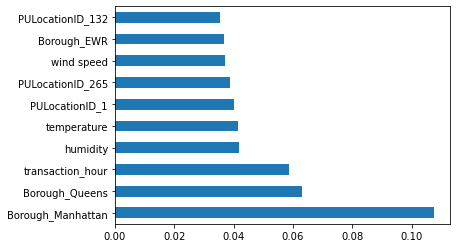

In [129]:
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh'))

<AxesSubplot:xlabel='true', ylabel='pred'>

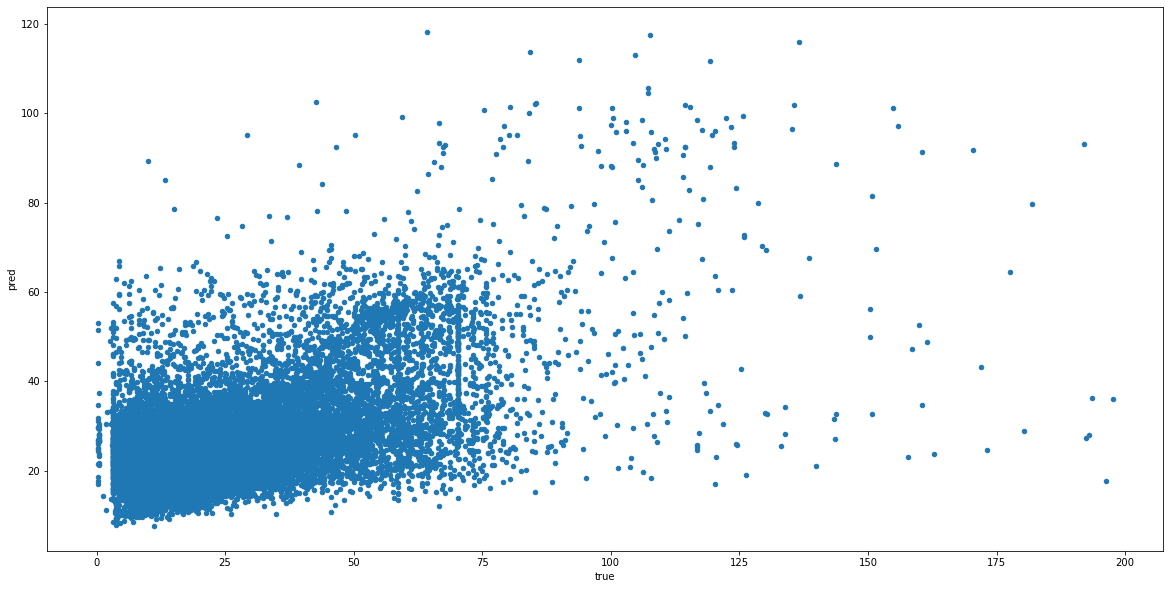

In [123]:
data = {'true':y_test, 'pred':y_pred}
results = pd.DataFrame(data)

results.plot.scatter('true', 'pred',figsize=(20,10)) 

## **Testing Model 3 that has the third highest test score and faster run time**
RandomForestRegressor(n_estimators=200,min_samples_split=10,min_samples_leaf=1,max_features='sqrt',max_depth=200,bootstrap=False)

In [126]:
import time
t0 = time.time()

second_best = RandomForestRegressor(n_estimators=200,min_samples_split=10,min_samples_leaf=1,max_features='sqrt',max_depth=200,bootstrap=False)
second_best.fit(X_train, y_train)

t1=time.time()-t0
print('Time elapsed:', t1, 'seconds')

model_at_hand = second_best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score   
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed: 46.12190628051758 seconds
mean_absolute_error 7.301006784587305
mean_squared_error 159.32436017529605
root_mean_squared_error 12.62237537768926
r2 0.4216885218080978


<AxesSubplot:>

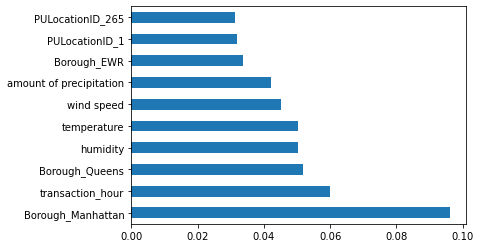

In [127]:
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh'))

**Let's plot Model 3**

<AxesSubplot:xlabel='true', ylabel='pred'>

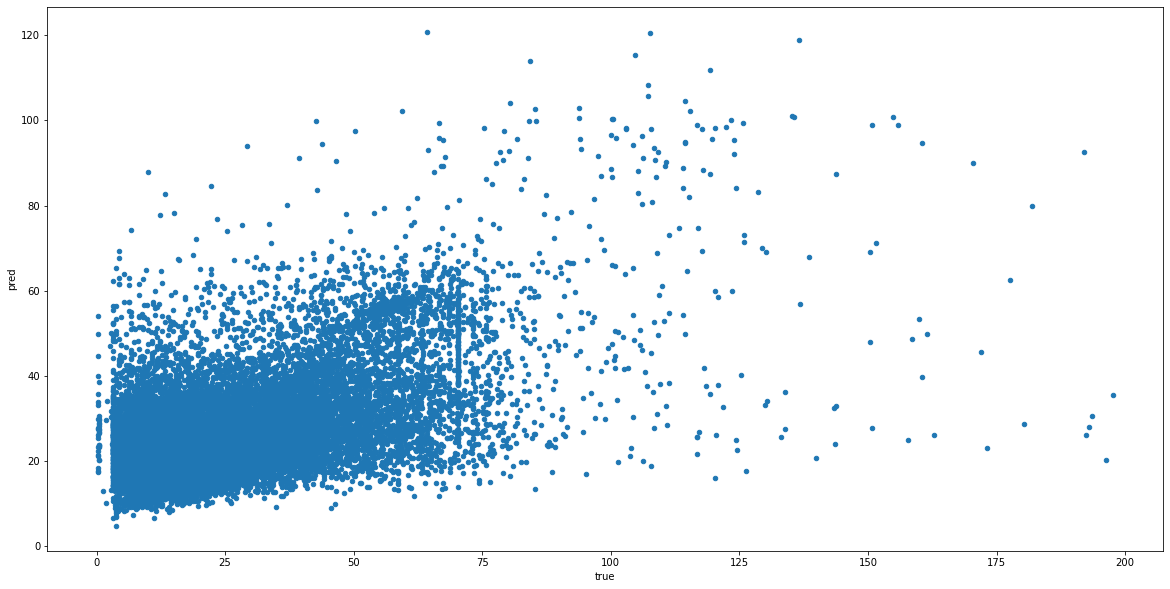

In [125]:
data = {'true':y_test, 'pred':y_pred}
results = pd.DataFrame(data)

results.plot.scatter('true', 'pred',figsize=(20,10)) 

# 9. Conclusion <a id='conclusion'></a>
[Back to top](#table_of_contents)

**The Best model and the Third best model have very similar values of R squared and RMSE.**

**For quicker run time, use model_3; for additional bit of accuracy, use model 1.**

In [133]:
Tuned_Models = {'Tuned_Models':['Model_1','Model_3'],'MAE':[7.275,7.30],'RMSE':[12.507,12.622],'R2':[0.432,0.421],'Time_Elapsed':[125.680,46.121]}

pd.DataFrame.from_dict(Tuned_Models)

,Tuned_Models,MAE,RMSE,R2,Time_Elapsed
0,Model_1,7.275,12.507,0.432,125.680
1,Model_3,7.300,12.622,0.421,46.121


## Summary of features

In [175]:
pd.DataFrame(input_features,columns=['Summary of input features used to predict target feature [Total_Amount]'])

,Summary of input features used to predict target feature [Total_Amount]
0,PULocationID
1,transaction_month
2,transaction_day
3,transaction_hour
4,transaction_week_day
5,weekend
6,is_holiday
7,Borough
8,temperature
9,humidity


**With the model in place, it is possible for taxi union to plug in all the features listed above the day or week beforehand and predict the amount of taxi income that a typical taxi driver can make in a specific region. In this way, there is more useful information for the union to arrange a fairer cab assignment and to rotate drivers from higher or lower income region equally.**

## Thoughts of improvements:
**As you can see from the plot above, the performance can be improved by adding the 3 features mentioned above. However, three are other ways that wasn’t tried in this notebook:**

**1. Limiting the region/borough included in this analysis. This might be a good action to take depending on the problem at hand. If the goal is to make predictions only in Manhattan region, we may increase the model performance by only keeping data points in Manhattan borough.**



In [134]:
data_with_new_features['Borough'].value_counts()

Manhattan        45309
Brooklyn         23632
Queens           21971
Bronx             9584
Unknown           1453
Staten Island      302
EWR                270
Name: Borough, dtype: int64

**2. Filtering out the location ID that do not normally get a lot of taxi traffic in any given hour. If the goal is solely to increase model performance, only including data points with location ID that has at least 3 or more aggregated_transactions may increase the performance, because we are making sure that each row is an average of taxi income based on multiple records, not just based on one or two records that may or may not represent a solid trend in a given area. Note that Manhattan borough alone already has 68 unique location IDs. Among the 45,309 entries, there are just 2,249 entries with hourly aggregated transaction less than 3. As a result, the filtering criteria will base on the problem definition.** 

   **For example, if the model has to work in all region of NYC, then we cannot filter out all entries with aggregated counts less than 6 because 6 is the median across all region, removing them may add a risk of removing representable data points. In contrast, if you want the model to only work in Manhattan, then we can take into account that the mean aggregated counts is 152, median is 83, so the filtering criteria will be relatively higher.**      

In [140]:
data_with_new_features['transactions_aggregated'].describe()

count    102521.000000
mean         74.692443
std         143.256816
min           1.000000
25%           1.000000
50%           6.000000
75%          73.000000
max        1402.000000
Name: transactions_aggregated, dtype: float64

In [141]:
Manhattan=data_with_new_features[data_with_new_features['Borough']=='Manhattan']
Manhattan['transactions_aggregated'].describe()

count    45309.000000
mean       152.942815
std        177.845058
min          1.000000
25%         21.000000
50%         83.000000
75%        231.000000
max       1402.000000
Name: transactions_aggregated, dtype: float64

## Problem transformation: Classification 

**I can also transform the problem into a classification type problem, so the model can be used for classifying regions with high earning class or low earning class, therefore, the target feature is the earning class of either High or Low.** 

In [176]:
nyc_taxi_with_weather['total_amount'].describe()

count    102521.000000
mean         21.682430
std          16.620106
min           0.300000
25%          12.403579
50%          15.300000
75%          24.206667
max         199.820000
Name: total_amount, dtype: float64

<AxesSubplot:>

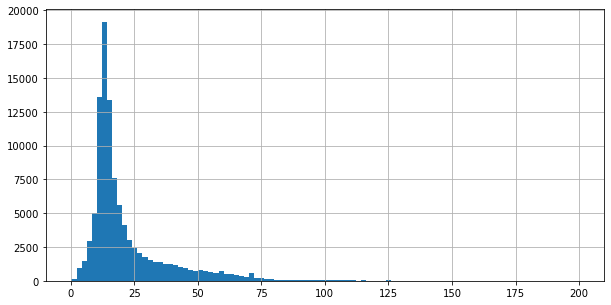

In [177]:
nyc_taxi_with_weather['total_amount'].hist(bins=100, figsize=(10,5))

**I will add a boolean feature about earning class to distinguish between High and Low earnings.**


**I will use the earnings of 15.5 as the separation point and to balance the two classes.**

In [178]:
nyc_class = nyc_taxi_with_weather.copy()
nyc_class['earning_class']=nyc_class['total_amount'].apply(lambda x: 'high' if x>15.5 else 'low')
nyc_class['earning_class_binary']=nyc_class['earning_class'].apply(lambda x: 0 if x=='low' else 1)
nyc_class.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transactions_aggregated,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation,earning_class,earning_class_binary
0,10,2019-01-01,1,1,0,3.020000,14.300000,2,1,False,True,Queens,8.3,97.0,0.0,1.0,29.0,low,0
1,100,2019-01-01,1,1,0,2.801852,18.130000,54,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0,high,1
2,106,2019-01-01,1,1,0,2.593333,15.373333,3,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0,low,0
3,107,2019-01-01,1,1,0,2.437458,14.897458,421,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0,low,0
4,11,2019-01-01,1,1,0,1.795000,9.300000,2,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0,low,0


In [179]:
nyc_class['earning_class'].value_counts()

low     52621
high    49900
Name: earning_class, dtype: int64

In [180]:
categorical_features = ['PULocationID','transaction_month','transaction_day','transaction_hour','transaction_week_day','weekend','is_holiday','Borough']
input_features = categorical_features + ['temperature','humidity','wind speed','cloud cover','amount of precipitation']
target_feature = 'earning_class_binary'

In [181]:
from sklearn.model_selection import train_test_split

X_c = nyc_class[input_features]
y_c = nyc_class[target_feature]

# one-hot encode
X_c = pd.get_dummies(X_c)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c,y_c,test_size=0.33,random_state=42)

In [182]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_c, y_train_c)

y_pred_c=clf.predict(X_test_c)

In [183]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from math import sqrt

print(confusion_matrix(y_test_c, y_pred_c))

print('accuracy', accuracy_score(y_test_c, y_pred_c))
print('precision', precision_score(y_test_c, y_pred_c))
print('recall', recall_score(y_test_c, y_pred_c))

[[12702  4749]
 [ 3744 12637]]
accuracy 0.7489654764719792
precision 0.7268491890026458
recall 0.7714425248763812


**The accuracy score of 74.8% means the model could make 74 correct predictions out of 100 total examples. The model has slightly higher Recall score than the precision score, that means the model tends to allow more false positive, in other words it tends to classify an area to be high earning class when it is low in reality.**  

<AxesSubplot:>

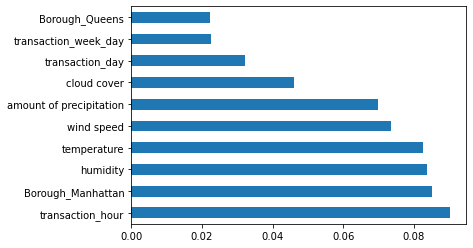

In [184]:
(pd.Series(clf.feature_importances_, index=X_train_c.columns)
   .nlargest(10)
   .plot(kind='barh'))

**With this model, the union could arrange the cab assignment even more easily because the output is simple. The regression model in the first section is good for overviewing the income predictions for each region, while the classifier is good for defining the region beforehand with simple highs or lows then make data-driven cab arrangement based on the output.** 